In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import json


In [3]:
#read file 
def read_file(file_name):

    with open(file_name) as f:
        json_data = json.load(f)
    return json_data

In [4]:
def  process_data(json_data):
    data = []

    for entry in json_data:
        # Check if the entry is a dictionary
        if isinstance(entry, dict):
            filename = entry.get("filename", "")
            observations = entry.get("observations", {})

            for plant, traits in observations.items():
                row_data = {"plant": plant, "filename": filename}
                for trait, values in traits.items():
                    if trait == "value":
                        # Handling special case where the value is a list
                        for i, label in enumerate(traits.get("label", [])):
                            # Check if values is a string
                            if isinstance(values, str):
                                row_data[label] = values  # Set the value directly
                            else:
                                row_data[label] = values[i]
                    else:
                        # Check if values is a string
                        if isinstance(values, str):
                            row_data[trait] = values  # Set the value directly
                        else:
                            row_data[trait] = values.get("value", None)

                data.append(row_data)

    
    return data

# Display the DataFrame
file_one = 'merged_file.json'
# file_two = 'merged_top.json'
json_file1 = read_file(file_one)
# json_file2 = read_file(file_two)
merged_data1 = process_data(json_file1)
# merged_data2 = process_data(json_file2)

# Add a new column 'group' with all values set to 'christa'
# merged_data1['group'] = 'christa'
# Combine data from both files into a single DataFrame
merged_df = pd.DataFrame(merged_data1)

# Display the combined DataFrame
merged_df

,plant,filename,in_bounds,area,convex_hull_area,solidity,perimeter,width,height,longest_path,...,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity,hue_frequencies,saturation_frequencies,value_frequencies,hue_circular_mean,hue_circular_std,hue_median
0,plant_1,results_file_1740501791.33339_GA_christa.jpg,True,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,plant_2,results_file_1740501791.33339_GA_christa.jpg,True,55.0,303.5,0.181219,70.811182,24.0,26.0,143.0,...,21.642620,18.801434,33.982590,0.495299,NaN,NaN,NaN,NaN,NaN,NaN
2,plant_3,results_file_1740501791.33339_GA_christa.jpg,True,506.0,2876.0,0.175939,391.143589,98.0,114.0,113.0,...,127.170036,37.148430,38.612186,0.956383,NaN,NaN,NaN,NaN,NaN,NaN
3,plant_4,results_file_1740501791.33339_GA_christa.jpg,True,75.0,438.5,0.171038,91.639609,28.0,33.0,32.0,...,33.529129,16.962437,37.260555,0.862591,NaN,NaN,NaN,NaN,NaN,NaN
4,plant_5,results_file_1740501791.33339_GA_christa.jpg,True,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,default_8,results_file_1741266066.236184_GA_christa.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.01620745542949757, 0.0, 0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",89.619831,5.882458,90.0
1508,default_9,results_file_1741266066.236184_GA_christa.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"[1.105630209219255, 1.1906786868515054, 1.2246...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",78.501143,29.754429,88.0
1509,default_10,results_file_1741266066.236184_GA_christa.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"[2.215680198326619, 2.484247495093482, 1.86447...","[0.0, 0.0, 0.0, 0.010329511414110114, 0.025823...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",67.162862,41.312745,88.0
1510,default_11,results_file_1741266066.236184_GA_christa.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"[0.4153569824876515, 0.2806466097889538, 0.056...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",85.849416,19.256019,90.0


In [5]:
# Copy DataFrame
df_cleaned = merged_df.copy()

# Identify rows with "default" values in the "plant" column
default_rows = df_cleaned['plant'].str.startswith('default')

# Drop rows with "default" values in the "plant" column
df_cleaned = df_cleaned[~default_rows]

# Reset the index
df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
df_cleaned

,plant,filename,in_bounds,area,convex_hull_area,solidity,perimeter,width,height,longest_path,...,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity,hue_frequencies,saturation_frequencies,value_frequencies,hue_circular_mean,hue_circular_std,hue_median
0,plant_1,results_file_1740501791.33339_GA_christa.jpg,True,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,plant_2,results_file_1740501791.33339_GA_christa.jpg,True,55.0,303.5,0.181219,70.811182,24.0,26.0,143.0,...,21.642620,18.801434,33.982590,0.495299,NaN,NaN,NaN,NaN,NaN,NaN
2,plant_3,results_file_1740501791.33339_GA_christa.jpg,True,506.0,2876.0,0.175939,391.143589,98.0,114.0,113.0,...,127.170036,37.148430,38.612186,0.956383,NaN,NaN,NaN,NaN,NaN,NaN
3,plant_4,results_file_1740501791.33339_GA_christa.jpg,True,75.0,438.5,0.171038,91.639609,28.0,33.0,32.0,...,33.529129,16.962437,37.260555,0.862591,NaN,NaN,NaN,NaN,NaN,NaN
4,plant_5,results_file_1740501791.33339_GA_christa.jpg,True,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,plant_8,results_file_1741266066.236184_GA_christa.jpg,True,6170.0,7761.5,0.794949,608.678018,147.0,88.0,990.0,...,147.000168,66.992744,70.434570,0.890117,NaN,NaN,NaN,NaN,NaN,NaN
752,plant_9,results_file_1741266066.236184_GA_christa.jpg,False,5879.0,14970.0,0.392719,1005.974253,135.0,162.0,1148.0,...,141.392120,122.059052,167.931351,0.504749,NaN,NaN,NaN,NaN,NaN,NaN
753,plant_10,results_file_1741266066.236184_GA_christa.jpg,False,19362.0,71367.0,0.271302,3591.172364,236.0,419.0,419.0,...,389.507111,187.651962,173.179291,0.876299,NaN,NaN,NaN,NaN,NaN,NaN
754,plant_11,results_file_1741266066.236184_GA_christa.jpg,False,8908.0,20237.5,0.440173,1404.574448,141.0,214.0,214.0,...,194.519714,112.143715,17.343992,0.817086,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#  Extract the numeric part which is Unix time stamp from the 'filename' column using regex
extracted_numbers = df_cleaned['filename'].str.extract(r'(\d+\.\d+)')[0]
# extract the group from the 'filename' colunms using regex
extracted_group = df_cleaned['filename'].str.extract(r'(\w[A]\_\w+)')[0]
# Add the extracted numbers and groups as new columns
df_cleaned['Date'] = extracted_numbers
df_cleaned['group'] = extracted_group
# Convert the extracted number to a numeric type (float) before passing it to pd.to_datetime
df_cleaned['Date'] = pd.to_datetime(extracted_numbers.astype(float), unit='s', utc=True, errors='coerce')


# # # Separate the date and time into two columns for 'Date' and 'time'
df_cleaned['Date'] = df_cleaned['Date'].dt.date  # Extract the date part
df_cleaned['time'] = df_cleaned['Date'].apply(lambda x: x.strftime('%H:%M:%S'))  # Extract the time part
# pd.to_datetime(time_strs, format="%H%M")

# Move the 'date' column to the first position (index 0)
df_cleaned.insert(0, 'Date', df_cleaned.pop('Date'))
# Move the 'group' column to the second position (index 2)
df_cleaned.insert(2, 'group', df_cleaned.pop('group'))
# Move the 'group' column to the second position (index 1)
df_cleaned.insert(1, 'time', df_cleaned.pop('time'))
# Drop the "filename" column
df_cleaned.drop(columns=['filename'], inplace=True)
df_cleaned.tail()

,Date,time,plant,group,in_bounds,area,convex_hull_area,solidity,perimeter,width,...,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity,hue_frequencies,saturation_frequencies,value_frequencies,hue_circular_mean,hue_circular_std,hue_median
751,2025-03-06,00:00:00,plant_8,GA_christa,True,6170.0,7761.5,0.794949,608.678018,147.0,...,147.000168,66.992744,70.434570,0.890117,NaN,NaN,NaN,NaN,NaN,NaN
752,2025-03-06,00:00:00,plant_9,GA_christa,False,5879.0,14970.0,0.392719,1005.974253,135.0,...,141.392120,122.059052,167.931351,0.504749,NaN,NaN,NaN,NaN,NaN,NaN
753,2025-03-06,00:00:00,plant_10,GA_christa,False,19362.0,71367.0,0.271302,3591.172364,236.0,...,389.507111,187.651962,173.179291,0.876299,NaN,NaN,NaN,NaN,NaN,NaN
754,2025-03-06,00:00:00,plant_11,GA_christa,False,8908.0,20237.5,0.440173,1404.574448,141.0,...,194.519714,112.143715,17.343992,0.817086,NaN,NaN,NaN,NaN,NaN,NaN
755,2025-03-06,00:00:00,plant_12,GA_christa,False,8341.0,20087.5,0.415233,1210.262834,118.0,...,209.675858,110.621758,166.468597,0.849502,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Specify columns to drop
columns_to_drop = ['hue_frequencies', 'saturation_frequencies', 'value_frequencies', 'hue_circular_mean', 'hue_circular_std', 'hue_median']

# Drop the specified columns
df_cleaned.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame after dropping columns
df_cleaned.tail()

,Date,time,plant,group,in_bounds,area,convex_hull_area,solidity,perimeter,width,height,longest_path,center_of_mass,convex_hull_vertices,object_in_frame,ellipse_center,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity
751,2025-03-06,00:00:00,plant_8,GA_christa,True,6170.0,7761.5,0.794949,608.678018,147.0,88.0,990.0,"[518.5623987034036, 254.31166936790925]",26.0,True,"[517.581787109375, 255.1193084716797]",147.000168,66.992744,70.434570,0.890117
752,2025-03-06,00:00:00,plant_9,GA_christa,False,5879.0,14970.0,0.392719,1005.974253,135.0,162.0,1148.0,"[51.816805579180134, 357.4220105460112]",26.0,False,"[62.96269607543945, 369.1565246582031]",141.392120,122.059052,167.931351,0.504749
753,2025-03-06,00:00:00,plant_10,GA_christa,False,19362.0,71367.0,0.271302,3591.172364,236.0,419.0,419.0,"[230.6813345728747, 310.2984195847536]",16.0,False,"[229.0098876953125, 291.6780090332031]",389.507111,187.651962,173.179291,0.876299
754,2025-03-06,00:00:00,plant_11,GA_christa,False,8908.0,20237.5,0.440173,1404.574448,141.0,214.0,214.0,"[405.93039964077235, 401.3747193533902]",16.0,False,"[408.9510498046875, 389.7609558105469]",194.519714,112.143715,17.343992,0.817086
755,2025-03-06,00:00:00,plant_12,GA_christa,False,8341.0,20087.5,0.415233,1210.262834,118.0,223.0,204.0,"[590.6867282100468, 374.425608440235]",25.0,False,"[590.6573486328125, 381.25592041015625]",209.675858,110.621758,166.468597,0.849502


In [8]:
# Create separate columns for the list of center_of_mass, ellipse_center
df_cleaned['ellipse_center_x'] = df_cleaned['ellipse_center'].apply(lambda x: x[0])
df_cleaned['ellipse_center_y'] = df_cleaned['ellipse_center'].apply(lambda x: x[1])
df_cleaned['center_of_mass_x'] = df_cleaned['center_of_mass'].apply(lambda x: x[0])
df_cleaned['center_of_mass_y'] = df_cleaned['center_of_mass'].apply(lambda x: x[1])
# Drop the original lists (optional)
df_cleaned.drop(columns=['ellipse_center', 'center_of_mass'], inplace=True)
df_cleaned.head(12)

,Date,time,plant,group,in_bounds,area,convex_hull_area,solidity,perimeter,width,...,convex_hull_vertices,object_in_frame,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity,ellipse_center_x,ellipse_center_y,center_of_mass_x,center_of_mass_y
0,2025-02-25,00:00:00,plant_1,GA_christa,True,0.0,0.0,0.000000,0.000000,0.0,...,0.0,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2025-02-25,00:00:00,plant_2,GA_christa,True,55.0,303.5,0.181219,70.811182,24.0,...,9.0,True,21.642620,18.801434,33.982590,0.495299,217.809006,143.753311,217.781818,143.800000
2,2025-02-25,00:00:00,plant_3,GA_christa,True,506.0,2876.0,0.175939,391.143589,98.0,...,17.0,True,127.170036,37.148430,38.612186,0.956383,416.676453,91.506935,439.440711,63.375494
3,2025-02-25,00:00:00,plant_4,GA_christa,True,75.0,438.5,0.171038,91.639609,28.0,...,11.0,True,33.529129,16.962437,37.260555,0.862591,548.703857,120.132027,548.653333,119.840000
4,2025-02-25,00:00:00,plant_5,GA_christa,True,0.0,0.0,0.000000,0.000000,0.0,...,0.0,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2025-02-25,00:00:00,plant_6,GA_christa,True,1383.0,32610.5,0.042410,1234.447305,239.0,...,28.0,True,239.603424,168.188736,88.504669,0.712230,156.961899,228.069061,213.580622,217.963124
6,2025-02-25,00:00:00,plant_7,GA_christa,True,368.0,2096.5,0.175531,374.803667,116.0,...,15.0,True,135.553314,26.225090,50.213577,0.981107,430.050385,261.760376,459.440217,237.119565
7,2025-02-25,00:00:00,plant_8,GA_christa,True,789.0,32830.0,0.024033,1656.885828,260.0,...,29.0,True,237.158478,168.136932,84.942963,0.705244,473.739075,211.185822,499.828897,209.323194
8,2025-02-25,00:00:00,plant_9,GA_christa,True,0.0,0.0,0.000000,0.000000,0.0,...,0.0,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2025-02-25,00:00:00,plant_10,GA_christa,True,825.0,29921.0,0.027573,902.987735,238.0,...,24.0,True,242.992355,160.273468,82.248856,0.751632,150.056412,383.050171,177.516364,376.585455


In [9]:
# Check for missing values in the DataFrame
missing_values = df_cleaned.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the missing count
print("Missing values count in each column:")
print(missing_count)

Missing values count in each column:
Date                     0
time                     0
plant                    0
group                   12
in_bounds                0
area                     0
convex_hull_area         0
solidity                 0
perimeter                0
width                    0
height                   0
longest_path             0
convex_hull_vertices     0
object_in_frame          0
ellipse_major_axis       0
ellipse_minor_axis       0
ellipse_angle            0
ellipse_eccentricity     0
ellipse_center_x         0
ellipse_center_y         0
center_of_mass_x         0
center_of_mass_y         0
dtype: int64


In [10]:
# Drop rows where any NaN value exists in the specified column
df = df_cleaned.dropna(subset=['group'])



In [11]:
# Mapping old values to new values
value_map = {
    'plant_1': 'ut_1', 'plant_2': 'usl_1', 'plant_3': 'psl_1',
    'plant_4': 'co_1', 'plant_5': 'psl_2', 'plant_6': 'usl_2',
    'plant_7': 'psl_3', 'plant_8': 'co_2', 'plant_9': 'ut_2',
    'plant_10': 'usl_3', 'plant_11': 'ut_3', 'plant_12': 'co_3'
}

# Replacing values in the 'plant' column based on the map
df['plant'] = df['plant'].replace(value_map)
df

C:\Users\kirt\AppData\Local\Temp\ipykernel_4928\2592568132.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['plant'] = df['plant'].replace(value_map)


,Date,time,plant,group,in_bounds,area,convex_hull_area,solidity,perimeter,width,...,convex_hull_vertices,object_in_frame,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity,ellipse_center_x,ellipse_center_y,center_of_mass_x,center_of_mass_y
0,2025-02-25,00:00:00,ut_1,GA_christa,True,0.0,0.0,0.000000,0.000000,0.0,...,0.0,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2025-02-25,00:00:00,usl_1,GA_christa,True,55.0,303.5,0.181219,70.811182,24.0,...,9.0,True,21.642620,18.801434,33.982590,0.495299,217.809006,143.753311,217.781818,143.800000
2,2025-02-25,00:00:00,psl_1,GA_christa,True,506.0,2876.0,0.175939,391.143589,98.0,...,17.0,True,127.170036,37.148430,38.612186,0.956383,416.676453,91.506935,439.440711,63.375494
3,2025-02-25,00:00:00,co_1,GA_christa,True,75.0,438.5,0.171038,91.639609,28.0,...,11.0,True,33.529129,16.962437,37.260555,0.862591,548.703857,120.132027,548.653333,119.840000
4,2025-02-25,00:00:00,psl_2,GA_christa,True,0.0,0.0,0.000000,0.000000,0.0,...,0.0,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2025-03-06,00:00:00,co_2,GA_christa,True,6170.0,7761.5,0.794949,608.678018,147.0,...,26.0,True,147.000168,66.992744,70.434570,0.890117,517.581787,255.119308,518.562399,254.311669
752,2025-03-06,00:00:00,ut_2,GA_christa,False,5879.0,14970.0,0.392719,1005.974253,135.0,...,26.0,False,141.392120,122.059052,167.931351,0.504749,62.962696,369.156525,51.816806,357.422011
753,2025-03-06,00:00:00,usl_3,GA_christa,False,19362.0,71367.0,0.271302,3591.172364,236.0,...,16.0,False,389.507111,187.651962,173.179291,0.876299,229.009888,291.678009,230.681335,310.298420
754,2025-03-06,00:00:00,ut_3,GA_christa,False,8908.0,20237.5,0.440173,1404.574448,141.0,...,16.0,False,194.519714,112.143715,17.343992,0.817086,408.951050,389.760956,405.930400,401.374719


In [12]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

outlier_dict = {} 
for x in numeric_columns:
    z_scores = stats.zscore(df_cleaned[x])
    outliers = np.where(np.abs(z_scores) > 3)[0]
    
    if len(outliers) > 0:
        outlier_dict[x] = outliers.tolist()
        print("Outliers detected:")
        print(f'{x} = {len(outliers)}')

Outliers detected:
area = 14
Outliers detected:
convex_hull_area = 14
Outliers detected:
perimeter = 18
Outliers detected:
width = 20
Outliers detected:
height = 16
Outliers detected:
longest_path = 18
Outliers detected:
ellipse_major_axis = 21
Outliers detected:
ellipse_minor_axis = 14


area = 14
convex_hull_area = 13
perimeter = 18
width = 19
height = 15
longest_path = 18
ellipse_major_axis = 20
ellipse_minor_axis = 13


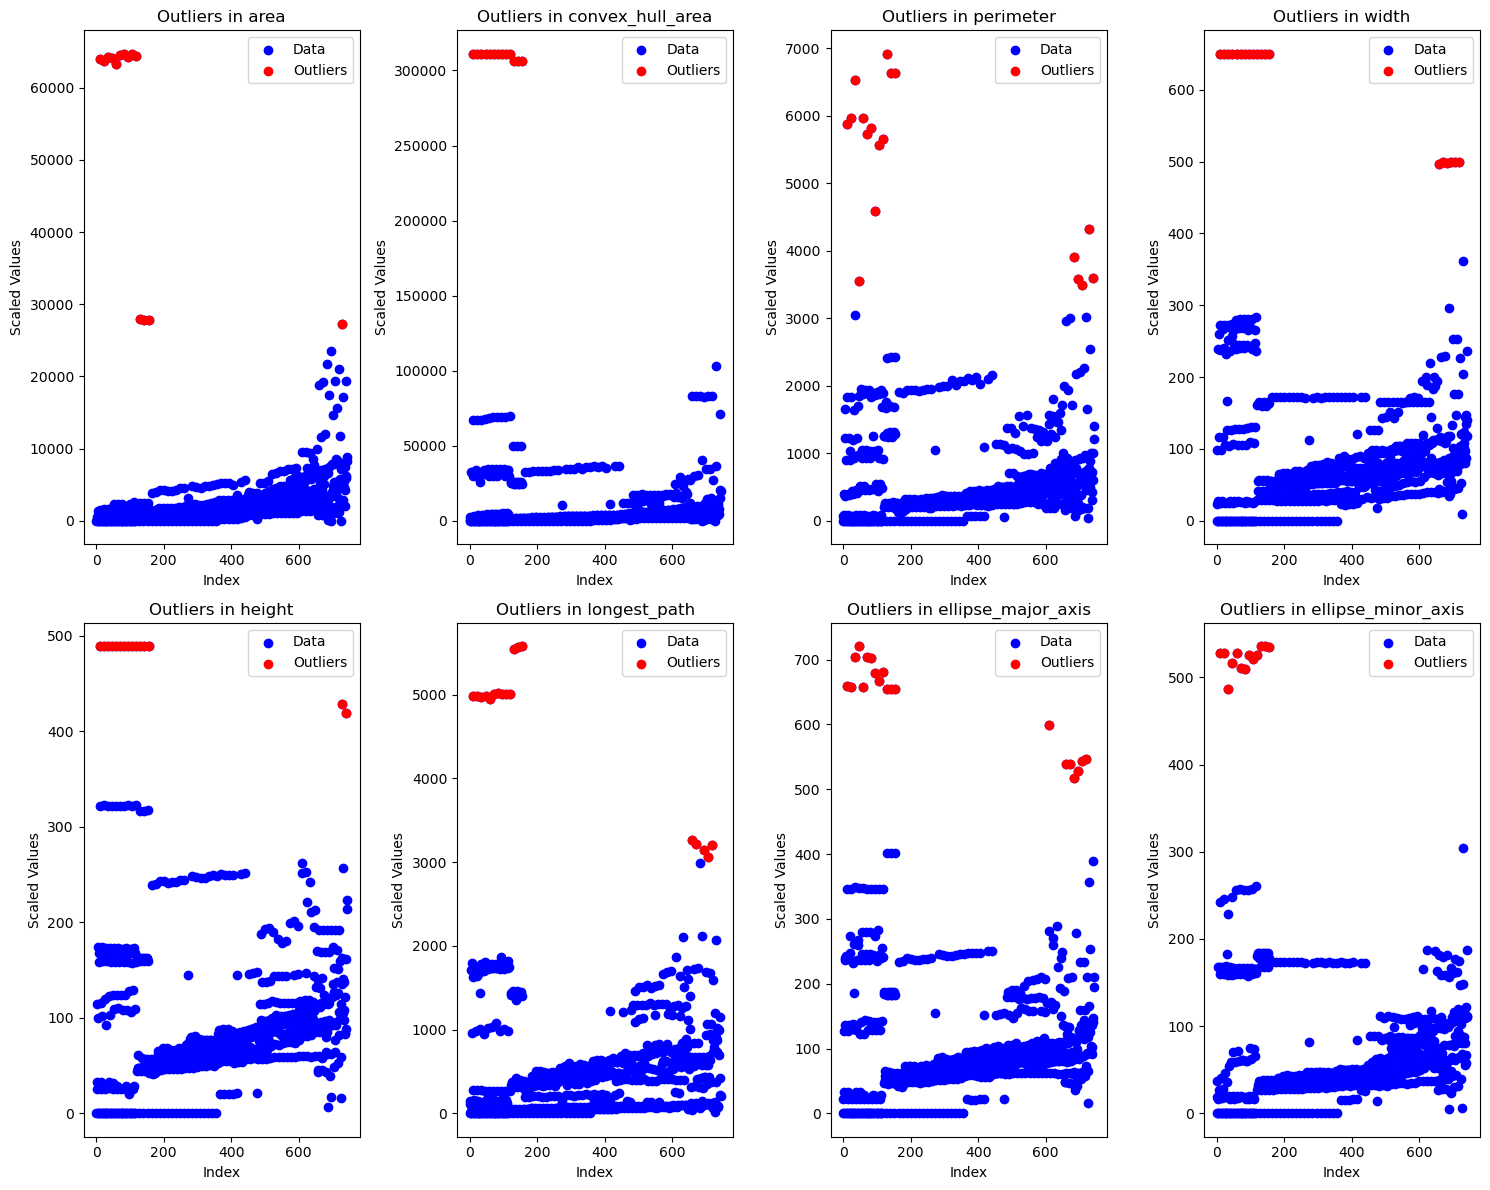

In [13]:
# list of columns
columns = ['area', 'convex_hull_area', 'perimeter', 'width', 'height', 'longest_path', 'ellipse_major_axis', 'ellipse_minor_axis']
outlier_dict = {}

# Assuming df_cleaned is your DataFrame

# Calculate the number of rows and columns for the subplots
num_cols = 4  # Adjust this based on your preference
num_rows = (len(columns) // num_cols) + (len(columns) % num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

for i, x in enumerate(columns):
    z_scores = stats.zscore(df[x])
    outliers = np.where(np.abs(z_scores) > 3)[0]

    if len(outliers) > 0:
        outlier_dict[x] = outliers.tolist()
        print(f'{x} = {len(outliers)}')

        # Plotting the data with outliers highlighted
        axes[i].scatter(range(len(df)), df[x], color='blue', label='Data')
        axes[i].scatter(outliers, df[x].iloc[outliers], color='red', label='Outliers')
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel('Scaled Values')
        axes[i].set_title(f'Outliers in {x}')
        axes[i].legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [14]:
# create a list of columns to remove outliers from the DataFrame
columns = ['area', 'convex_hull_area', 'perimeter', 'width', 'height', 'longest_path', 'ellipse_major_axis', 'ellipse_minor_axis']

# initialize a new DataFrame to store the cleaned data
new_df = df.copy()

# intrate over the columns and remove outliers
for x in columns:
    # calculate the z-scores
    z_scores = stats.zscore(new_df[x])
    # define outlier thresholds(3 standard deviations(z-score > 3 or z-score < -3) which is equivalent to 99.7% of the data)
    upper_limit = 3

    # identify the row with the absolute value of the z-score greater than 3
    outliers_mask = np.abs(z_scores) > upper_limit
    

    # Remove outliers by keeping only the rows that are not outlires
    new_df = new_df[~outliers_mask]

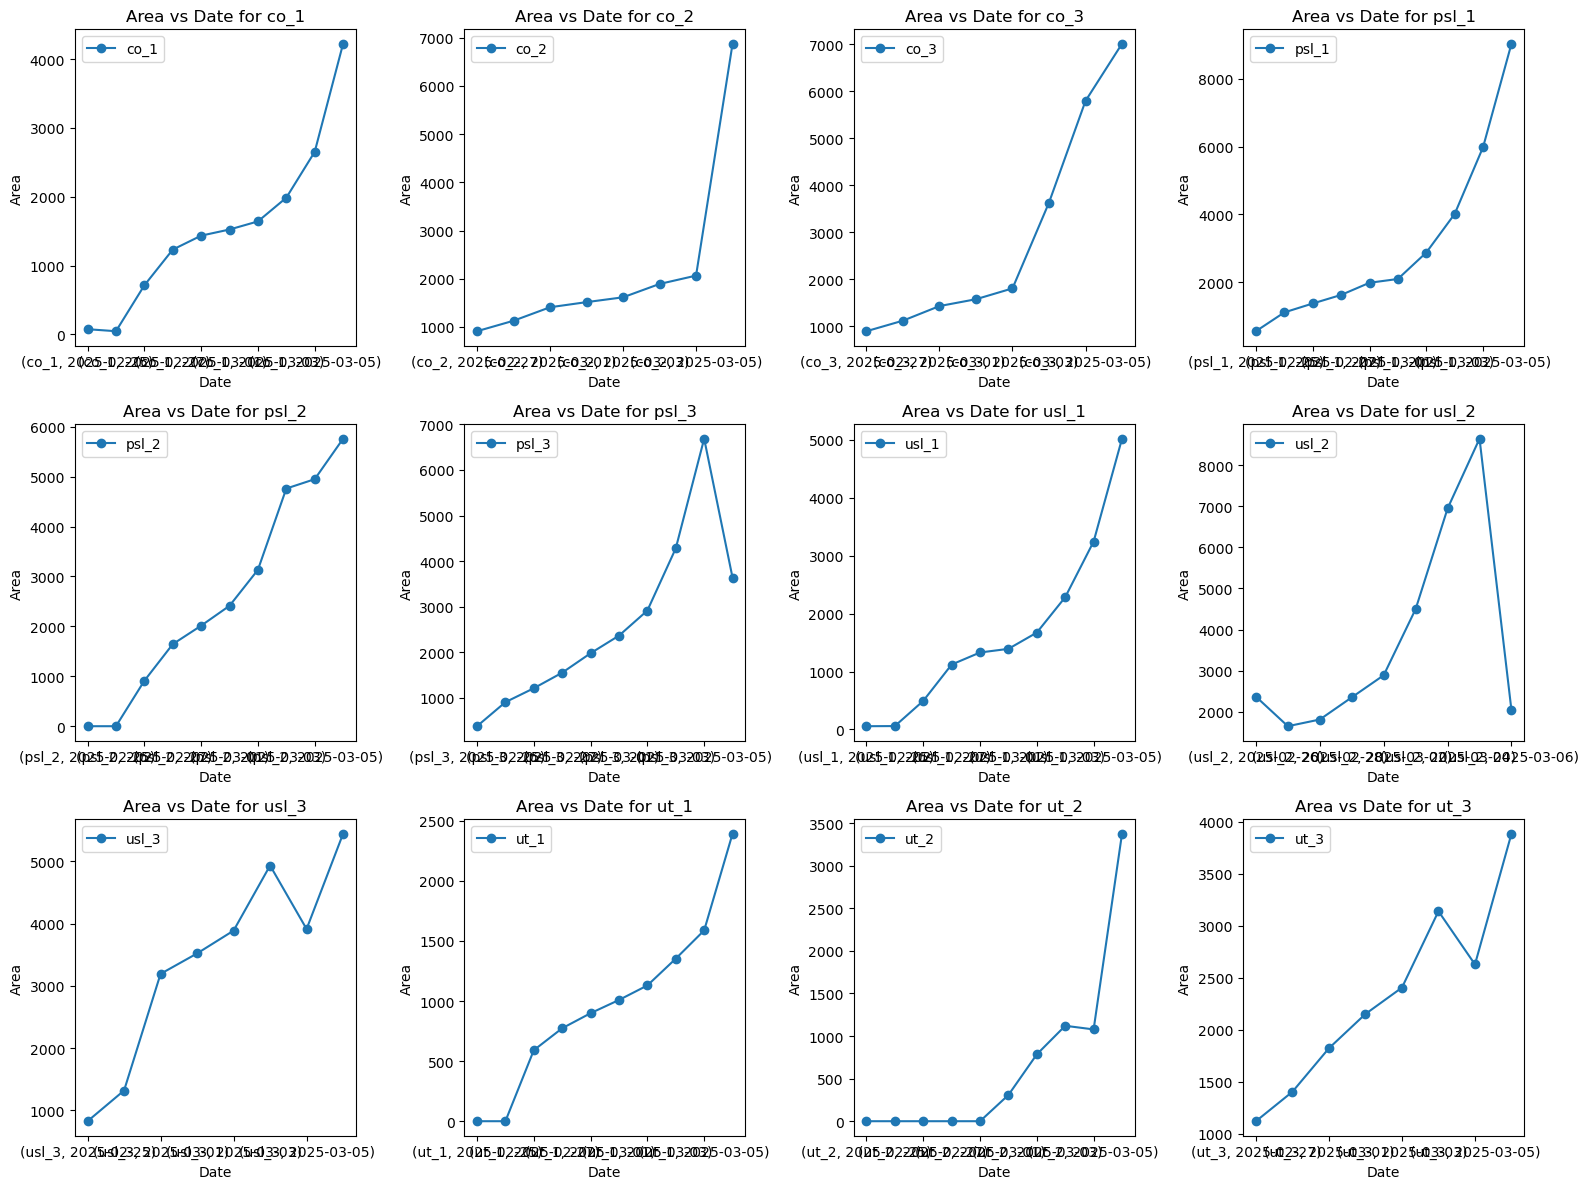

In [16]:
# Group by 'plant' and 'date' and calculate the mean
grouped_df = new_df.groupby(['plant', 'Date'])['area'].mean()
# Create individual line plots for each plant in a 4x6 grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, (plant, group) in enumerate(grouped_df.groupby('plant')):
    row = i // 4
    col = i % 4
    group.plot(x='Date', y='area', label=plant, ax=axes[i], marker='o')
    axes[i].set_title(f'Area vs Date for {plant}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Area')
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

https://github.com/automl/fanova/tree/master

https://automl.github.io/fanova/